In [ ]:
import keras
import os
import shutil
import random
import matplotlib.pyplot as plt

from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/flowers.zip' -d '/content/training_data'

### Zadanie 3

W zadaniu $3$ należy użyć małego zbioru danych do wytrenowania sieci neuronowej (zadanie klasyfikacji) i w tym celu trzeba zastosować takie techniki jak: data augmentation, transfer learning i fine tuning. W moim rozwiązaniu wykorzystam zbiór danych *flowers*, który był podany w treści zadania. Na początku zbudujmy prostą sieć konwolucyjną:

In [ ]:
model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(5, activation='softmax'))

Wyświetlmy dane dotyczące utworzonego modelu:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

Następnie należy odpowiednio przetworzyć zbiór danych. W zbiorze danych *flowers* mamy łącznie $4242$ zdjęcia różnych kwiatów i $5$ kategorii (tulipan, mlecz, róża, słonecznik i stokrotka). Niestety dane nie są podzielone na zbiór treningowy, walidacyjny i testowy - to jest dodatkowy krok do wykonania. Najpierw utworzmy odpowiednie zbiory danych. Poniższy kod dzieli zbiór danych *flowers* na zbiór treningowy i walidacyjny (w stosunku $80 \%$ do $20 \%$):    

In [ ]:
flowers_dir = f'/content/training_data/flowers'

train_dir = f'/content/training_data/flowers/train'
validation_dir = f'/content/training_data/flowers/validation'

# category = f'dandelion'

# decision_list = [False, True]

# current_path = os.path.join(flowers_dir, category)

# for fname in os.listdir(current_path):
#    decision = random.choices(decision_list, weights=(8, 2), k=1)[0]
    
#    if decision:
#        shutil.move(os.path.join(current_path, fname), os.path.join(validation_dir, category))
#    else:
#        shutil.move(os.path.join(current_path, fname), os.path.join(train_dir, category))

Następnie wczytamy zdjęcia ze zbiorów, zmienimy je w tensory z liczbami zmiennoprzecinkowymi i unormujemy ich wartości tak aby były z przedziału $[0, 1]$:

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=25,
    class_mode=f'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=25,
    class_mode=f'categorical'
)

Found 3459 images belonging to 5 classes.
Found 864 images belonging to 5 classes.


Sprawdźmy, czy wszystko działa:

In [ ]:
for data_batch, labels_batch in train_generator:
    print(f'Data batch shape: {data_batch.shape}')
    print(f'Label batch shape: {labels_batch.shape}')
    break

Data batch shape: (25, 150, 150, 3)
Label batch shape: (25, 5)


Następnie możemy skompilować nasz model:

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

Potem możemy zacząć trening naszego modelu:

In [ ]:
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_steps=20,
    validation_data=validation_generator
)

Epoch 1/50
100/100 [==============================] - 10s 88ms/step - loss: 1.3992 - accuracy: 0.3740 - val_loss: 1.2174 - val_accuracy: 0.4220
Epoch 2/50
100/100 [==============================] - 10s 99ms/step - loss: 1.1743 - accuracy: 0.5032 - val_loss: 1.0712 - val_accuracy: 0.5700
Epoch 3/50
100/100 [==============================] - 9s 86ms/step - loss: 1.0874 - accuracy: 0.5733 - val_loss: 1.0844 - val_accuracy: 0.5480
Epoch 4/50
100/100 [==============================] - 9s 87ms/step - loss: 1.0166 - accuracy: 0.6052 - val_loss: 1.0806 - val_accuracy: 0.5640
Epoch 5/50
100/100 [==============================] - 10s 104ms/step - loss: 0.9719 - accuracy: 0.6240 - val_loss: 0.9900 - val_accuracy: 0.6160
Epoch 6/50
100/100 [==============================] - 10s 97ms/step - loss: 0.9515 - accuracy: 0.6308 - val_loss: 0.9664 - val_accuracy: 0.6060
Epoch 7/50
100/100 [==============================] - 9s 86ms/step - loss: 0.8975 - accuracy: 0.6530 - val_loss: 0.8651 - val_accuracy: 0

Po skończonym treningu zobaczmy jak wyglądają odpowiednie statystyki:

In [ ]:
def get_all_parameters(history):

    history_dict = history.history

    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    epochs = len(accuracy)
    ep = list(range(1, epochs))
    
    return loss, val_loss, accuracy, val_accuracy, epochs, ep


def draw_loss_plot(history):

    loss, val_loss, _, _, epochs, ep = get_all_parameters(history)

    plt.title(f'Training and validation loss')

    plt.xlabel(f'Epochs')
    plt.ylabel(f'Loss')

    plt.plot(ep, loss[1:epochs], '.', color='blue')
    plt.plot(ep, val_loss[1:epochs], '.', color='red')


def draw_accuracy_plot(history):
    _, _, accuracy, val_accuracy, epochs, ep = get_all_parameters(history)
    
    plt.title(f'Training and validation accuracy')

    plt.xlabel(f'Epochs')
    plt.ylabel(f'Accuracy')

    plt.plot(ep, accuracy[1:epochs], '.', color='blue')
    plt.plot(ep, val_accuracy[1:epochs], '.', color='red')

Wykres numer $1$:

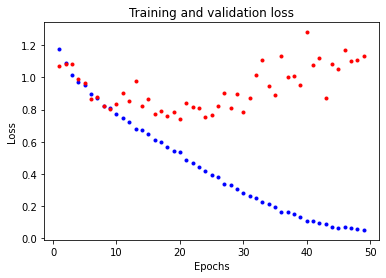

In [ ]:
draw_loss_plot(history)

Wykres numer $2$:

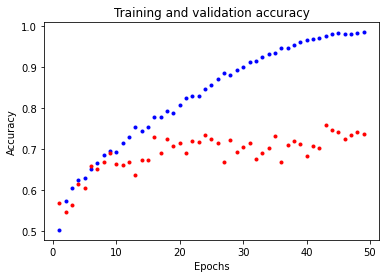

In [ ]:
draw_accuracy_plot(history)

Zatem widać, że po zastosowaniu tylko samej konwolucyjnen sieci neuronowej (sieć jest bardzo podobna do tej podanej na wykładzie), uzyskujemy skuteczność na poziomie $98 \%$ na zbiorze treningowym i $74 \%$ na zbiorze walidacyjnym. Strata na zbiorze treningowym malała wraz z epokami, a na zbiorze walidacyjnym utrzymywała się na stałym poziomie lub rosła (możliwe, że tutaj również mamy do czynienia z overfittingiem).

### Data augmentation:

Ze względu na małą liczbe obrazków w zbiorze treningowym, musimy zastosować technika regularyzacji zwaną *data augmentation*. Wykorzystywana funkcja *ImageDataGenerator* pozwala nam prosto przeprowadzić ten zabieg. Co prawda dodaliśmy nowe przykłady w zbiorze treningowym, jednakże zależności między nimi są silne (bo przekształcaliśmy istniejące obrazki). Zatem nie dodajemy żadnej nowej informacji do naszego zbioru a jedynie przerebiamy istniejące przykłady. To może nie wystarczyć do zwalczenia overfittingu. Z tego powodu zastosujemy jeszcze jedną metodę walki z overfittingiem, czyli dodamy do sieci warstwe dropout:

In [ ]:
model = models.Sequential()


model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dropout(0.6))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(5, activation='softmax'))


model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 17, 17, 128)     

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


Rozpocznijmy trening sieci:

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    vertical_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=25,
    class_mode=f'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=25,
    class_mode=f'categorical'
)

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=50,
    validation_steps=20,
    validation_data=validation_generator
)

Found 3459 images belonging to 5 classes.
Found 864 images belonging to 5 classes.
Epoch 1/50
100/100 [==============================] - 20s 198ms/step - loss: 1.2845 - accuracy: 0.4171 - val_loss: 1.2150 - val_accuracy: 0.4600
Epoch 2/50
100/100 [==============================] - 20s 196ms/step - loss: 1.2218 - accuracy: 0.4684 - val_loss: 1.1443 - val_accuracy: 0.5240
Epoch 3/50
100/100 [==============================] - 21s 208ms/step - loss: 1.1635 - accuracy: 0.5129 - val_loss: 1.0542 - val_accuracy: 0.5780
Epoch 4/50
100/100 [==============================] - 20s 202ms/step - loss: 1.1447 - accuracy: 0.5246 - val_loss: 1.0664 - val_accuracy: 0.5740
Epoch 5/50
100/100 [==============================] - 21s 207ms/step - loss: 1.1006 - accuracy: 0.5620 - val_loss: 0.9831 - val_accuracy: 0.6080
Epoch 6/50
100/100 [==============================] - 19s 194ms/step - loss: 1.0593 - accuracy: 0.5656 - val_loss: 1.1693 - val_accuracy: 0.5160
Epoch 7/50
100/100 [===========================

Zobaczmy jak wyglądają parametry po treningu:

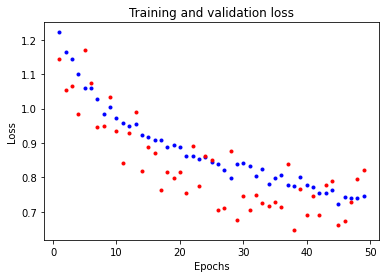

In [ ]:
draw_loss_plot(history)

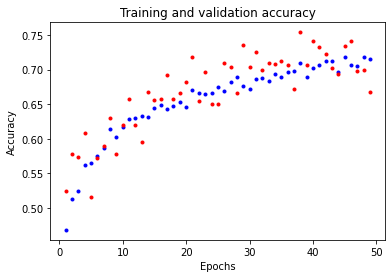

In [ ]:
draw_accuracy_plot(history)

Analizując otrzymane dane można dojść do wniosku, że tak naprawdę przez ten zabieg pogorszyliśmy jakość naszego modelu. Jednakże zamieszczone wykresy przedstawiają troszeczkę coś innego - strata na zbiorze walidacyjnym jest mniejsza niż w poprzednim modelu (dla zbioru treningowego niestety wzrosła, ale jest to normalne przy walce z overfittingiem - coś za coś) i poza tym malała (ale wolno) wraz z liczbą epok (czyli jest na odwrót niż w poprzednim modelu). Z drugiego wykresu wynika, że skuteczność na obu zbiorach dla tego modelu rosła (wolno) wraz z liczbą epok - czyli znowu mamy pewną poprawę w stosunku do poprzedniego modelu, gdzie np. skuteczność na zbiorze walidacyjnym utrzymywała się mniej więcej na takim samym poziomie.

### Transfer learning

W tym punkcie zastosoujemy wcześniej wytrenowaną sieć neuronową na bardzo dużym zbiorze danych. Przerobimy tą sieć w taki sposób, że usuniemy warstwy gęste na "górze" sieci (w ich miejsce wstawimy własne warstwy gęste), a zostawimy wytrenowane warstwy konwolucyjne (zakładamy, że one bardzo dobrze wydobywają cechy z obrazków, ponieważ były trenowane na bardzo dużym zbiorze danych).

In [ ]:
from keras.applications import VGG16

convolutional_base = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(150, 150, 3)
)

58889256/58889256 [==============================] - 2s 0us/step


Zobaczmy jakie są parametry tej sieci:

In [ ]:
convolutional_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

Mamy tylko warstwy konwolucyjne z wagami z jakiejś większej sieci. Teraz dodamy naszą własną warstwe gęstą (również zachowamy warstwe dropout):

In [ ]:
convolutional_base.trainable = False

model = models.Sequential()

model.add(convolutional_base)

model.add(layers.Flatten())

model.add(layers.Dropout(0.4))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(learning_rate=1e-4),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_6 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_4 (Dropout)         (None, 8192)              0         
                                                                 
 dense_12 (Dense)            (None, 512)               4194816   
                                                                 
 dense_13 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 18,912,069
Trainable params: 4,197,381
Non-trainable params: 14,714,688
_________________________________________________________________


Wytrenujmy model i sprawdźmy jego parametry:

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    vertical_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=25,
    class_mode=f'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=25,
    class_mode=f'categorical'
)

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_steps=20,
    validation_data=validation_generator
)

Found 3459 images belonging to 5 classes.
Found 864 images belonging to 5 classes.
Epoch 1/30
100/100 [==============================] - 22s 218ms/step - loss: 1.1988 - accuracy: 0.5274 - val_loss: 0.9155 - val_accuracy: 0.6420
Epoch 2/30
100/100 [==============================] - 21s 208ms/step - loss: 1.0174 - accuracy: 0.6027 - val_loss: 0.7574 - val_accuracy: 0.7220
Epoch 3/30
100/100 [==============================] - 21s 207ms/step - loss: 0.9733 - accuracy: 0.6232 - val_loss: 0.6650 - val_accuracy: 0.7580
Epoch 4/30
100/100 [==============================] - 22s 222ms/step - loss: 0.9306 - accuracy: 0.6425 - val_loss: 0.6787 - val_accuracy: 0.7420
Epoch 5/30
100/100 [==============================] - 21s 214ms/step - loss: 0.8977 - accuracy: 0.6655 - val_loss: 0.6369 - val_accuracy: 0.7680
Epoch 6/30
100/100 [==============================] - 22s 215ms/step - loss: 0.8920 - accuracy: 0.6723 - val_loss: 0.6924 - val_accuracy: 0.7600
Epoch 7/30
100/100 [===========================

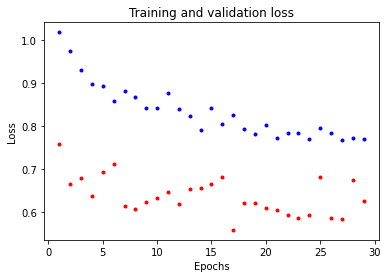

In [ ]:
draw_loss_plot(history)

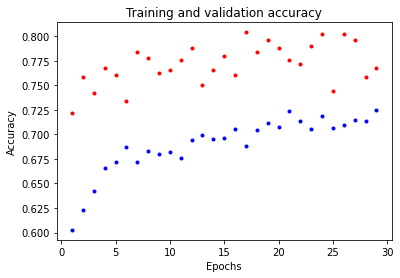

In [ ]:
draw_accuracy_plot(history)

Z powyższych wykresów wynika, że udało nam się osiągnąć skuteczność na zbiorze walidacyjnym rzędu $80 \%$ - jest to znaczna poprawa w stosunku do $2$ poprzednich modeli. Również strata na zbiorze walidacyjnym jest mniejsza niż w poprzednich modelach.

### Fine tunning

W tej sytuacj nie "zamrażamy" warstw konwolucyjnych, ale pozwalamy na to, aby algorytm wstecznej propagacji trochę pozmieniał wagi w niektórych warstwach konwolucyjnych (intuicja: bardziej "skroimy" model pod nasze zastosowania). Poniższy kod ustawia część warstw jako te, które trening zmieni:

In [ ]:
convolutional_base.trainable = True

set_trainable = False

for layer in convolutional_base.layers:
    if layer.name == 'block5_conv1':
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

Następnie znowu uruchamiamy trening sieci neuronowej i wyświetlamy wyniki:

In [ ]:
model = models.Sequential()

model.add(convolutional_base)

model.add(layers.Flatten())

model.add(layers.Dropout(0.6))

model.add(layers.Dense(512, activation='relu'))

model.add(layers.Dense(5, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=optimizers.RMSprop(lr=1e-4),
    metrics=['accuracy']
)

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_8 (Flatten)         (None, 8192)              0         
                                                                 
 dropout_6 (Dropout)         (None, 8192)              0         
                                                                 
 dense_16 (Dense)            (None, 512)               4194816   
                                                                 
 dense_17 (Dense)            (None, 5)                 2565      
                                                                 
Total params: 18,912,069
Trainable params: 11,276,805
Non-trainable params: 7,635,264
_________________________________________________________________


/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/rmsprop.py:135: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.3,
    shear_range=0.2,
    zoom_range=0.3,
    vertical_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=25,
    class_mode=f'categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=25,
    class_mode=f'categorical'
)

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_steps=20,
    validation_data=validation_generator
)

Found 3459 images belonging to 5 classes.
Found 864 images belonging to 5 classes.
Epoch 1/30
100/100 [==============================] - 41s 219ms/step - loss: 1.1452 - accuracy: 0.5400 - val_loss: 0.8489 - val_accuracy: 0.7000
Epoch 2/30
100/100 [==============================] - 22s 218ms/step - loss: 0.7715 - accuracy: 0.7136 - val_loss: 0.5615 - val_accuracy: 0.7840
Epoch 3/30
100/100 [==============================] - 22s 219ms/step - loss: 0.7227 - accuracy: 0.7307 - val_loss: 0.5223 - val_accuracy: 0.8120
Epoch 4/30
100/100 [==============================] - 22s 224ms/step - loss: 0.6184 - accuracy: 0.7738 - val_loss: 0.4885 - val_accuracy: 0.8120
Epoch 5/30
100/100 [==============================] - 23s 231ms/step - loss: 0.5928 - accuracy: 0.7814 - val_loss: 0.8924 - val_accuracy: 0.7420
Epoch 6/30
100/100 [==============================] - 22s 218ms/step - loss: 0.5575 - accuracy: 0.7975 - val_loss: 0.4932 - val_accuracy: 0.8340
Epoch 7/30
100/100 [===========================

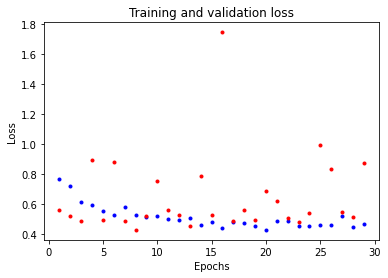

In [ ]:
draw_loss_plot(history)

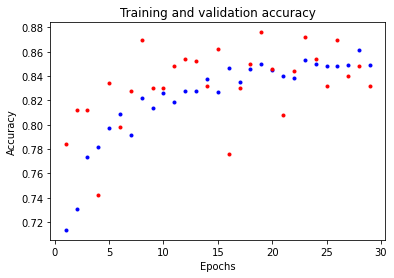

In [ ]:
draw_accuracy_plot(history)

Widać na dwóch powyższych wykresach, że skuteczność modelu jest lepsza niż w poprzednim przypadku (na obu zbiorach).